In [1]:
from sklearn import svm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.utils import shuffle, class_weight
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier

from imblearn.over_sampling import SMOTE

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2

In [2]:
!wget -O fetal_health.csv https://raw.githubusercontent.com/b0bhat/colab-data/main/fetal_health.csv
df = pd.read_csv("fetal_health.csv")
df.head()

--2024-03-12 20:38:18--  https://raw.githubusercontent.com/b0bhat/colab-data/main/fetal_health.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228715 (223K) [text/plain]
Saving to: ‘fetal_health.csv’

fetal_health.csv    100%[===================>] 223.35K  --.-KB/s    in 0.02s   

2024-03-12 20:38:18 (11.9 MB/s) - ‘fetal_health.csv’ saved [228715/228715]



,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


Training accuracy (MLP): 0.9129411764705883
Test accuracy (MLP): 0.8896713615023474


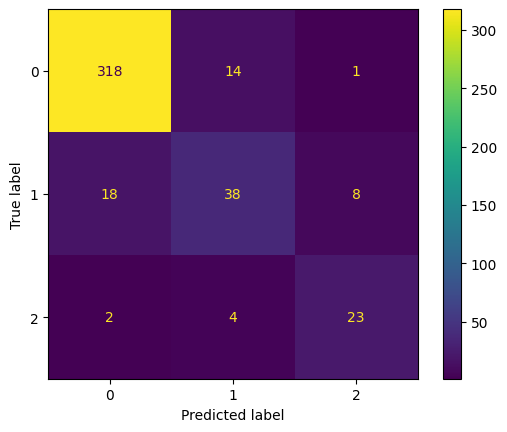

In [3]:
allfeatures = df.columns
dropped = ['fetal_health', 'histogram_min', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency']

X = df.drop(columns=dropped)
y = df["fetal_health"]

# split into train n test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp_clf.fit(X_train_pca, y_train)

y_train_pred_mlp = mlp_clf.predict(X_train_pca)
y_test_pred_mlp = mlp_clf.predict(X_test_pca)

train_accuracy_mlp = accuracy_score(y_train, y_train_pred_mlp)
test_accuracy_mlp = accuracy_score(y_test, y_test_pred_mlp)
cm_mlp = confusion_matrix(y_test, y_test_pred_mlp)

ConfusionMatrixDisplay(cm_mlp).plot()
print("Training accuracy (MLP):", train_accuracy_mlp)
print("Test accuracy (MLP):", test_accuracy_mlp)

(array([1655.,    0.,    0.,    0.,    0., 1655.,    0.,    0.,    0.,
        1655.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

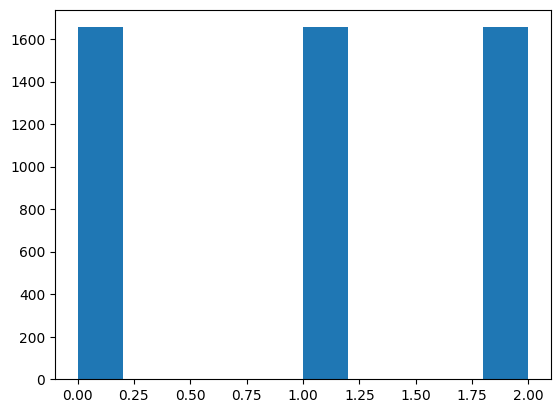

In [17]:
X = df.drop(columns=dropped)
y = df["fetal_health"]-1

smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

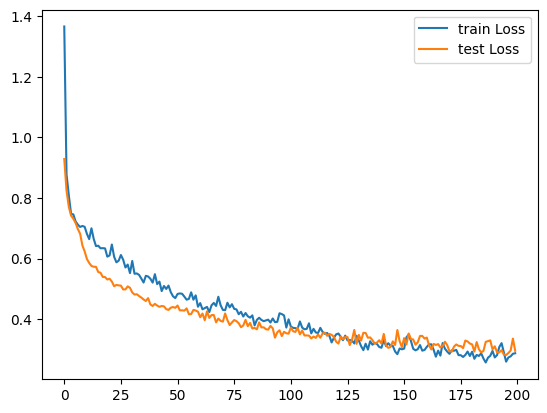

14/14 [==============================] - 0s 2ms/step
Training accuracy (Neural Network): 0.9547058823529412
Test accuracy (Neural Network): 0.9248826291079812


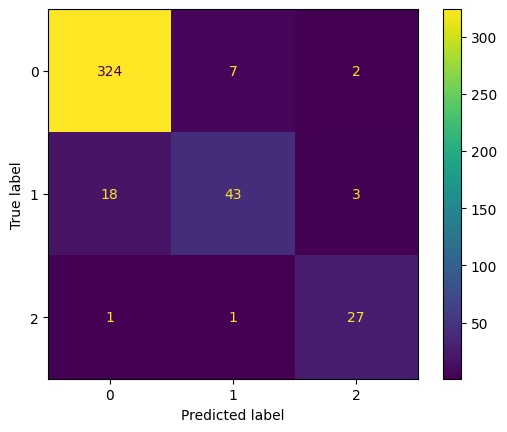

In [6]:
allfeatures = df.columns
dropped = ['fetal_health', 'histogram_width', 'histogram_max', 'histogram_min', 'histogram_median', 'histogram_mean', 'histogram_mode', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_tendency']

X = df.drop(columns=dropped)
y = df["fetal_health"]-1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# smote = SMOTE(random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
# class_weight_dict = dict(enumerate(class_weights))

model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(16, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(8, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(3, activation='softmax')
])

sgd = SGD(learning_rate=0.01, momentum=0.9)
# adam = Adam(learning_rate=0.001)
model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=64, validation_split=0.2, class_weight=class_weight_dict, verbose=0)
history = model.fit(X_train_scaled, y_train, epochs=200, batch_size=64, validation_split=0.2, verbose=0)

plt.plot(history.history['loss'], label='train Loss')
plt.plot(history.history['val_loss'], label='test Loss')
plt.legend()
plt.show()

train_accuracy = model.evaluate(X_train_scaled, y_train, verbose=0)[1]
test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)[1]

y_train_pred_nn = np.argmax(model.predict(X_train_scaled), axis=-1)
y_test_pred_nn = np.argmax(model.predict(X_test_scaled), axis=-1)

train_accuracy_nn = accuracy_score(y_train, y_train_pred_nn)
test_accuracy_nn = accuracy_score(y_test, y_test_pred_nn)
cm_nn = confusion_matrix(y_test, y_test_pred_nn)

ConfusionMatrixDisplay(cm_nn).plot()

print("Training accuracy (Neural Network):", train_accuracy_nn)
print("Test accuracy (Neural Network):", test_accuracy_nn)